In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np

import mypd
from signals import raw_autocorrelation
from spiketrain.sptr import SpikeTrains

from actxanalysis.data.celldata import CellData
from actxanalysis.data.stimdata import StimData
from paths import *

%load_ext autoreload
%autoreload 2

#### __init__

In [2]:
neuron_folder = 'ACx_data_1/ACxThelo/20171114-d003-f004'

dic_stim = dict(type='fmsweep')

cd = CellData(folder=data_folder + neuron_folder)

t0, tf = -50, 300
t = np.arange(t0, tf, cd.dt)
stimdata = cd.get_stimdata(dic_stim, ['speed', 'speed_abs', 'sweep_direction', 'duration'], t0=t0, tf=tf)
stimdata = stimdata.sort_values(['sweep_direction', 'speed_abs'], ascending=[False, True])

#### plot

<AxesSubplot:xlabel='time (ms)', ylabel='speed'>

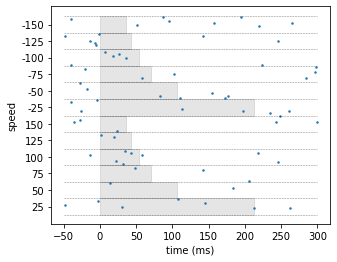

In [3]:
stimdata.plot_raster(ms=5, mew=0, marker='.', groupby='speed')

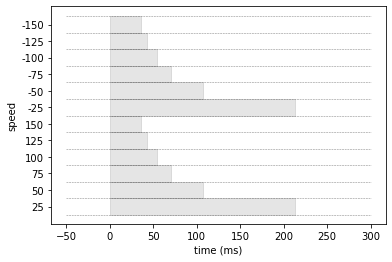

In [6]:
fig, ax = plt.subplots()
stimdata.plot_stimulus_duration(ax=ax, groupby='speed')

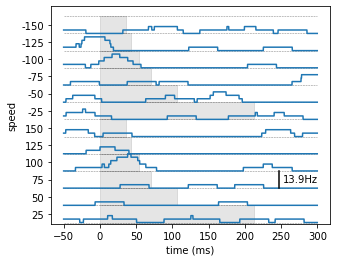

In [46]:
from spiketrain.kernel.rect import KernelRect

delta = 40
ker = KernelRect([-delta / 2, delta / 2], coefs=[1. / delta])

stimdata.plot_psth(ker, groupby='speed')

In [40]:
stimdata.df

,type,speed,speed_abs,sweep_direction,duration,n_trials
0,fmsweep,25,25,up,213.0,9
1,fmsweep,50,50,up,107.0,9
2,fmsweep,75,75,up,71.0,9
3,fmsweep,100,100,up,54.0,9
4,fmsweep,125,125,up,43.0,9
5,fmsweep,150,150,up,36.0,9
6,fmsweep,-25,25,down,213.0,9
7,fmsweep,-50,50,down,107.0,9
8,fmsweep,-75,75,down,71.0,9
9,fmsweep,-100,100,down,54.0,9


#### get_mask_spikes_stim

In [ ]:
dic_stim = dict(type='fmsweep')

t0, tf = -50, 300
t = np.arange(t0, tf, cd.dt)
stim_cats, mask_spikes_stim = cd.get_mask_spikes_stim(dic_stim, ['speed'], t0=t0, tf=tf)
mask_spikes_stim = mask_spikes_stim.reshape(mask_spikes_stim.shape[0], -1)
mask_spikes_stim = mask_spikes_stim[:, ~np.isnan(mask_spikes_stim[0, :])]
st = SpikeTrain(t, mask_spikes_stim)
st.plot(ms=3, mew=0, marker='o')

### get_autocorrelation

In [ ]:
dbin = 10
tbins = np.arange(500, 1800 + dbin, dbin)

autocorr = raw_autocorrelation(stim_data.st.mask, biased=False)
autocorr = np.nanmean(autocorr, axis=(1, 2))

raw_autocorr = stim_data.get_autocorrelation(tbins, autocorr_type='raw')
mean_raw_autocorr = np.nanmean(raw_autocorr, axis=(1, 2))

pearson_autocorr = stim_data.get_autocorrelation(tbins, autocorr_type='pearson')
mean_pearson_autocorr = np.nanmean(pearson_autocorr, axis=(1, 2))

t_autocorr = np.arange(0, len(tbins) - 1, 1) * dbin

arg0 = 1
argf = int(600 / 20)

fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
# ax1.plot(t_autocorr[arg0:argf], autocorr[arg0:argf]);
ax1.plot(t_autocorr[arg0:argf], mean_raw_autocorr[arg0:argf]);
ax2.plot(t_autocorr[arg0:argf], mean_pearson_autocorr[arg0:argf]);